In [1]:
import scipy
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from sklearn import preprocessing
from numpy import fft as fft

In [2]:
sample_rate, wav_data = wavfile.read('_3OBKkv7DZE.wav')
#print(sample_rate)
#print(wav_data)

times = np.arange(len(wav_data))/float(sample_rate)
length = times.shape[0]
channels = wav_data.shape[1]

for i in range(channels):
    
    if i == 0:
        temp_data = wav_data[:,0]
        wav_scaled = preprocessing.scale(temp_data)
        
    else:
        temp_data = wav_data[:,i]
        temp_scaled = preprocessing.scale(temp_data)
        wav_scaled = np.vstack([wav_scaled,temp_scaled])
        
wav_scaled = wav_scaled.T

C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\tyler\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


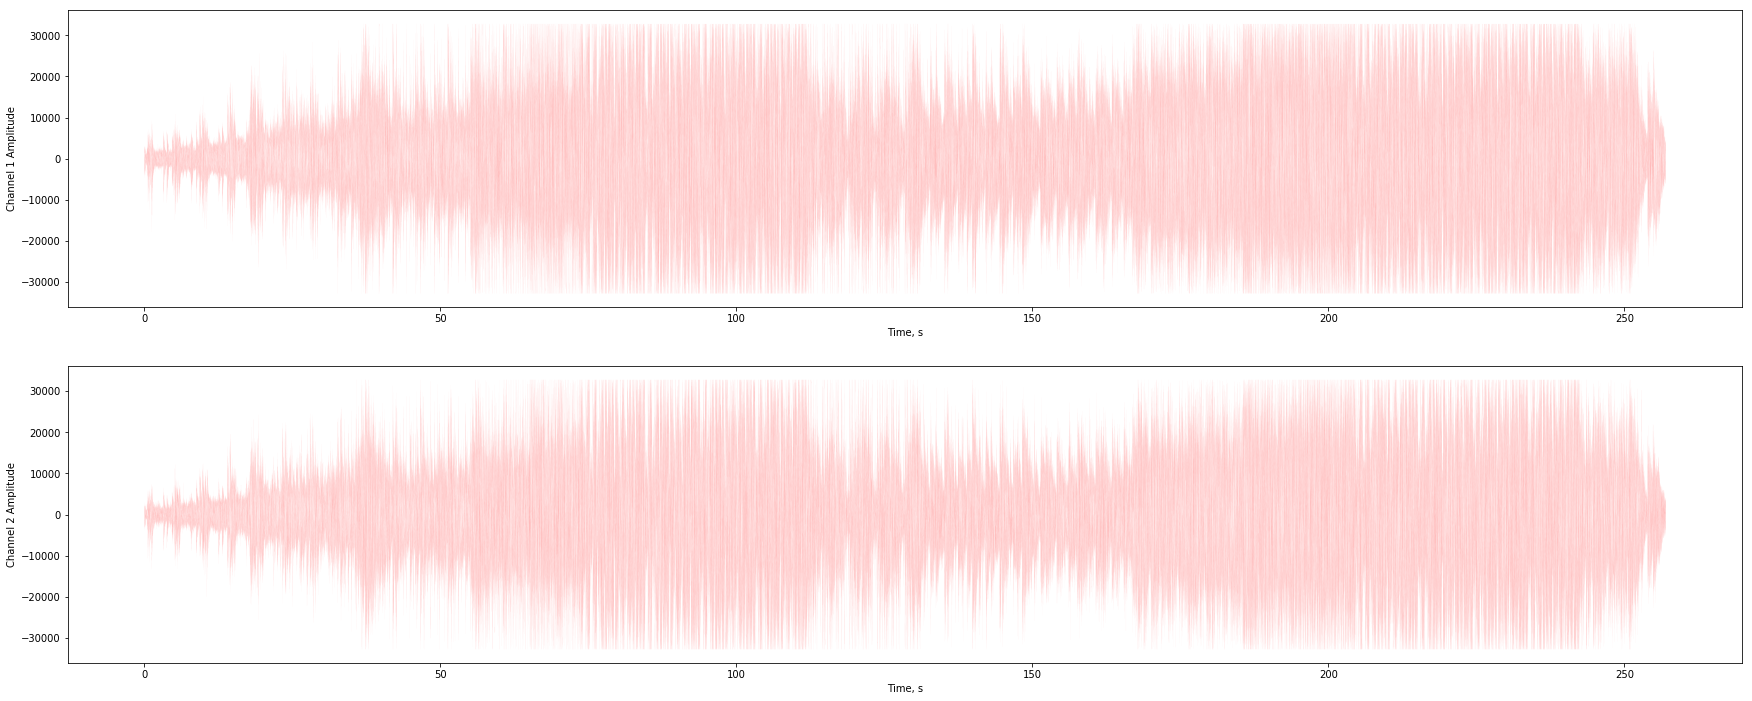

In [5]:
f = plt.figure(figsize=(30,6*channels))

for i in range(channels):
    
    wav_plot = f.add_subplot(channels,1,i+1)
    wav_plot.set_xlabel('Time, s')
    wav_plot.set_ylabel('Channel ' + str(i+1) + ' Amplitude')
    wav_plot.plot(times, wav_data[:,i],'r',linewidth=0.01)

In [43]:
for i in range(channels):
    if i == 0:
        ft = fft.fft(wav_scaled[:,0])
        
    else:
        temp_ft = fft.fft(wav_scaled[:,i])
        ft = np.vstack([ft,temp_ft])
        
ft = abs(ft.T.real)
freq_axis = np.arange(0,length,1)*(sample_rate/length)# /1000 divide by 1000 to make kHz

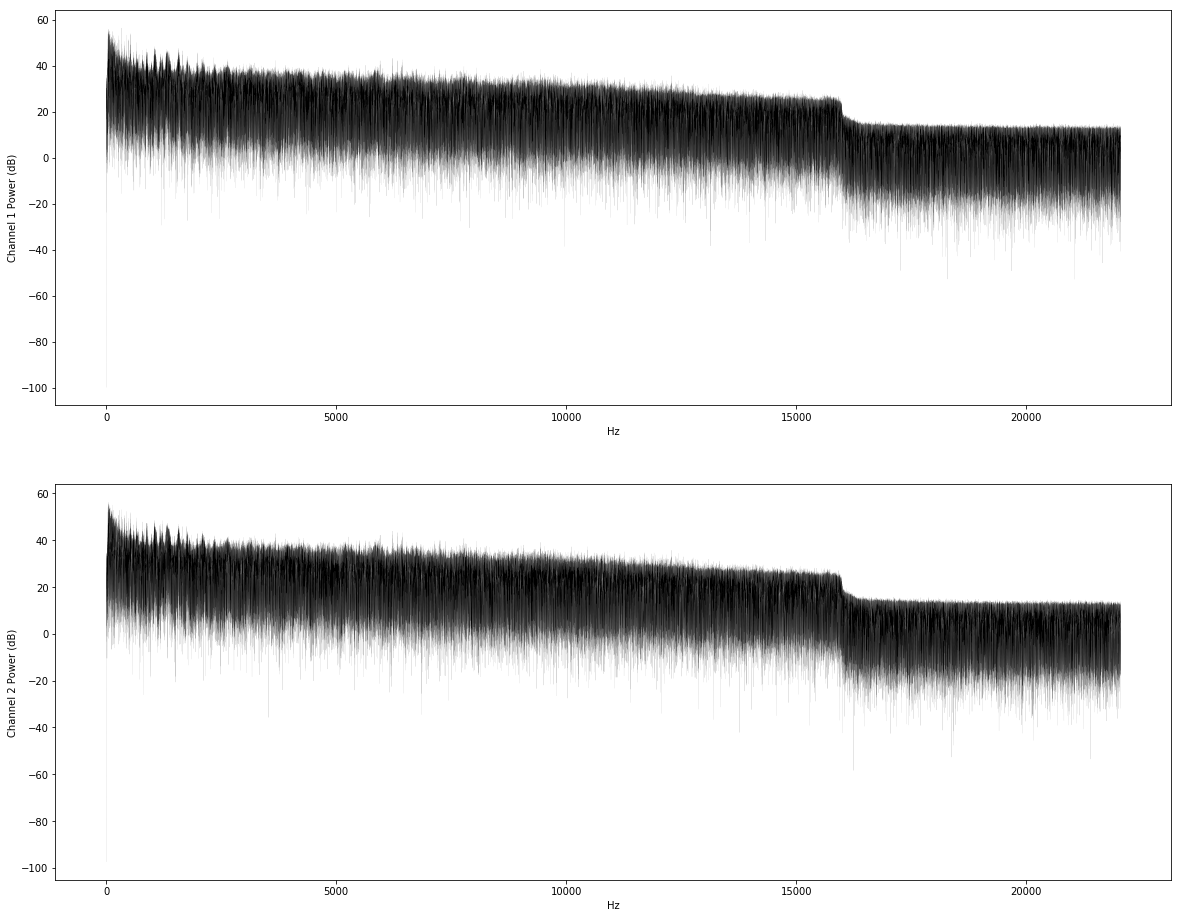

In [45]:
g = plt.figure(figsize=(20,8*channels))

for i in range(channels):
    
    ft_plot = g.add_subplot(channels,1,i+1)
    ft_plot.set_xlabel('Hz')
    ft_plot.set_ylabel('Channel ' + str(i+1) + ' Power (dB)')
    ft_plot.plot(freq_axis[0:(int(length/2))], 10*np.log10(ft[0:(int(length/2)),i]), 'k', linewidth=0.05)
    #ft_plot.show()

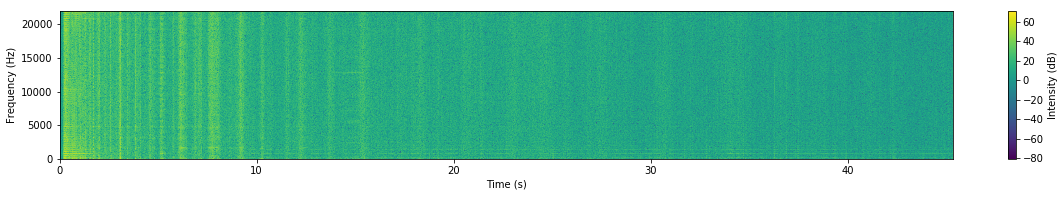

In [49]:
plt.figure(3, figsize=(20,6))
plt.subplot(211)
Pxx, freqs, bins, im = plt.specgram(ft[1:2000000,1], Fs=sample_rate, NFFT=2048)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar=plt.colorbar(im)
cbar.set_label('Intensity (dB)')